Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data
Overview
In this assignment, we will develop a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to enhance our understanding of ANNs and the role of hyperparameter tuning in optimizing model performance.

Tasks
Data Exploration and Preprocessing

Load and explore the "Alphabets_data.csv" dataset.
Summarize key features such as the number of samples, features, and classes.
Perform data preprocessing including normalization and handling missing values.
Model Implementation

Construct a basic ANN model with at least one hidden layer.
Split the dataset into training and testing sets.
Train the model and make predictions on the test set.
Hyperparameter Tuning

Tune hyperparameters such as the number of hidden layers, neurons per layer, activation functions, and learning rate.
Use grid search or random search for hyperparameter tuning and document the methodology.
Evaluation

Evaluate the model using accuracy, precision, recall, and F1-score.
Compare the performance of the default and tuned models, and discuss the impact of hyperparameter tuning.
Additional Resources
TensorFlow Documentation
Keras Documentation

Epoch 1/50
400/400 - 5s - 13ms/step - accuracy: 0.1111 - loss: 3.2465 - val_accuracy: 0.4238 - val_loss: 2.3223
Epoch 2/50
400/400 - 2s - 6ms/step - accuracy: 0.2955 - loss: 2.3066 - val_accuracy: 0.5934 - val_loss: 1.6311
Epoch 3/50
400/400 - 2s - 6ms/step - accuracy: 0.3977 - loss: 1.9227 - val_accuracy: 0.6619 - val_loss: 1.3467
Epoch 4/50
400/400 - 3s - 9ms/step - accuracy: 0.4566 - loss: 1.7172 - val_accuracy: 0.6869 - val_loss: 1.1960
Epoch 5/50
400/400 - 4s - 11ms/step - accuracy: 0.5130 - loss: 1.5605 - val_accuracy: 0.7166 - val_loss: 1.0827
Epoch 6/50
400/400 - 2s - 6ms/step - accuracy: 0.5273 - loss: 1.4905 - val_accuracy: 0.7184 - val_loss: 1.0265
Epoch 7/50
400/400 - 3s - 7ms/step - accuracy: 0.5500 - loss: 1.4166 - val_accuracy: 0.7422 - val_loss: 0.9588
Epoch 8/50
400/400 - 3s - 6ms/step - accuracy: 0.5738 - loss: 1.3469 - val_accuracy: 0.7347 - val_loss: 0.9655
Epoch 9/50
400/400 - 2s - 5ms/step - accuracy: 0.5776 - loss: 1.3218 - val_accuracy: 0.7525 - val_loss: 0.9223

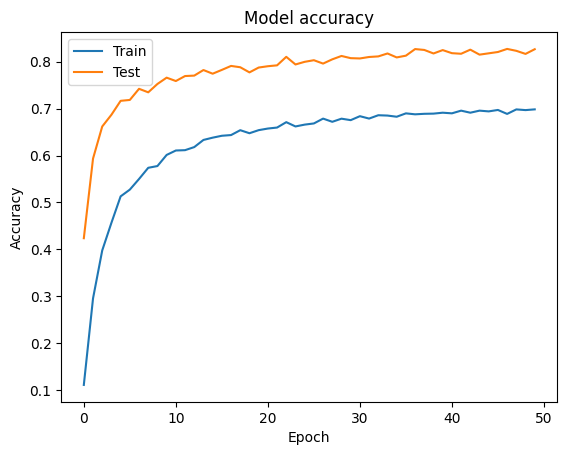

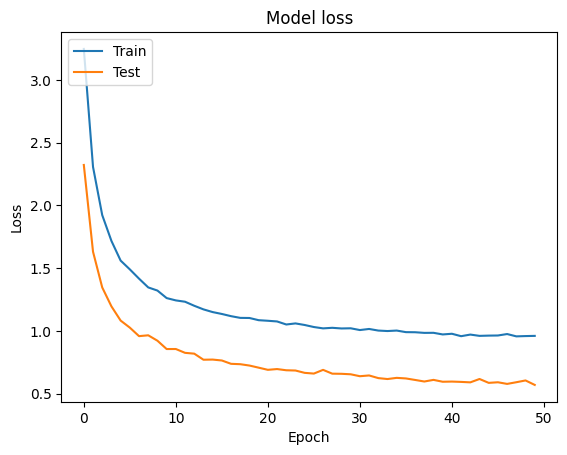

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model

# Load dataset
df = pd.read_csv(r'C:\Users\lenovo\Desktop\Excelr\Data Science\Data Science Projects\Data Science Excel File and Datasets\Alphabets_data.csv')

# Features and target variable
X = df.drop('letter', axis=1).values
y = df['letter'].values

# Convert target variable to numeric labels
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

# Convert numeric labels to categorical
y_categorical = to_categorical(y_numeric)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Create model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer specifying the shape
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Print first few predictions and true labels
print("Predicted classes:", predicted_classes[:10])
print("True classes:", true_classes[:10])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Save model in Keras format
model.save('my_model.keras')

# Load model (Optional)
# loaded_model = load_model('my_model.keras')
